<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Code_challenge.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

## Integrated Project: Understanding the yield
© ExploreAI Academy

In this coding challenge, we will apply all of the skills we learned in regression.

⚠️ **Note that this code challenge is graded and will contribute to your overall marks for this module. Submit this notebook for grading. Note that the names of the functions are different in this notebook. Transfer the code in your notebook to this submission notebook**

### Instructions

- **Do not add or remove cells in this notebook. Do not edit or remove the `### START FUNCTION` or `### END FUNCTION` comments. Do not add any code outside of the functions you are required to edit. Doing any of this will lead to a mark of 0%!**

- Answer the questions according to the specifications provided.

- Use the given cell in each question to see if your function matches the expected outputs.

- Do not hard-code answers to the questions.

- The use of StackOverflow, Google, and other online tools is permitted. However, copying a fellow student's code is not permissible and is considered a breach of the Honour code. Doing this will result in a mark of 0%.

# Introduction to Simple Linear Regression

Simple linear regression is a fundamental statistical method used to quantify the relationship between two variables. It allows us to predict an outcome (dependent variable) based on the value of one predictor (independent variable). In this challenge, we will apply simple linear regression to understand how different environmental factors affect the standardised yield of crops.

Our insights will not only help local farmers maximise their harvests but also contribute to the sustainable agriculture practices in Maji Ndogo.



# Initial data exploration

Before we sow the seeds of our regression model, we need to get to know our soil – the dataset. This dataset was developed through extensive agricultural surveys conducted at farms across Maji Ndogo. It contains various factors that might influence a farm's crop yield, from the elevation of the fields to the average temperature they bask in.

Spend some time looking at the data dictionary and start thinking about what could be influencing our crop yield.

# Data dictionary

**1. Geographic features**

- **Field_ID:** A unique identifier for each field (BigInt).
 
- **Elevation:** The elevation of the field above sea level in metres (Float).

- **Latitude:** Geographical latitude of the field in degrees (Float). (DUMMY VARIABLE- the simulation might have created a relationship)

- **Longitude:** Geographical longitude of the field in degrees (Float). (DUMMY VARIABLE- the simulation might have created a relationship)

- **Location:** Province the field is in (Text).

- **Slope:** The slope of the land in the field (Float).

**2. Weather features**

- **Rainfall:** Amount of rainfall in the area in mm (Float).

- **Min_temperature_C:** Average minimum temperature recorded in Celsius (Float).(DUMMY VARIABLE)

- **Max_temperature_C:** Average maximum temperature recorded in Celsius (Float).(DUMMY VARIABLE)

- **Ave_temps:** Average temperature in Celcius (Float).

**3. Soil and crop features**

- **Soil_fertility:** A measure of soil fertility where 0 is infertile soil, and 1 is very fertile soil (Float).

- **Soil_type:** Type of soil present in the field (Text).

- **pH:** pH level of the soil, which is a measure of how acidic/basic the soil is (Float).

**4. Farm management features**

- **Field_ID:** Corresponding field identifier (BigInt).

- **Pollution_level:** Level of pollution in the area where 0 is unpolluted and 1 is very polluted (Float).

- **Plot_size:** Size of the plot in the field (Ha) (Float). (DUMMY VARIABLE)

- **Chosen_crop:** Type of crop chosen for cultivation (Text).

- **Annual_yield:** Annual yield from the field (Float). This is the total output of the field. The field size and type of crop will affect the Annual Yield (DUMMY VARIABLE - Removed)

<br>

**5. Target variable**
- **Standard_yield:** Standardised yield expected from the field, normalised per crop (Float). This is independent of field size, or crop type. Multiplying this number by the field size, and average crop yield will give the Annual_Yield.

---

Let's import our database again, like we did last time. We won't use the weather data so it is commented out.

**Important:** Ensure that the `data_ingestion.py` file and the `field_data_processor.py` files are stored in the same folder as your notebook, otherwise the data import will fail. The links to the files are below:

[Download files here](https://github.com/Explore-AI/Public-Data/raw/master/Maji_Ndogo/modules.zip)

In [1]:
# Read the database, and clean the data using the processing modules we built.

import re
import numpy as np
import pandas as pd
from field_data_processor import FieldDataProcessor
# from weather_data_processor import WeatherDataProcessor
import logging 

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

config_params = {
    "sql_query": """
            SELECT *
            FROM geographic_features
            LEFT JOIN weather_features USING (Field_ID)
            LEFT JOIN soil_and_crop_features USING (Field_ID)
            LEFT JOIN farm_management_features USING (Field_ID)
            """,
    "db_path": 'sqlite:///Maji_Ndogo_farm_survey_small.db',
    "columns_to_rename": {'Annual_yield': 'Crop_type', 'Crop_type': 'Annual_yield'},
    "values_to_rename": {'cassaval': 'cassava', 'wheatn': 'wheat', 'teaa': 'tea'},
    "weather_csv_path": "https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Maji_Ndogo/Weather_station_data.csv",
    "weather_mapping_csv": "https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Maji_Ndogo/Weather_data_field_mapping.csv",
    "regex_patterns" : {
            'Rainfall': r'(\d+(\.\d+)?)\s?mm',
            'Temperature': r'(\d+(\.\d+)?)\s?C',
            'Pollution_level': r'=\s*(-?\d+(\.\d+)?)|Pollution at \s*(-?\d+(\.\d+)?)'
            },
}
# Ignoring the field data for now.
field_processor = FieldDataProcessor(config_params)
field_processor.process()
field_df = field_processor.df

# We're not going to use the weather data this time, so we'll ignore it.
# weather_processor = WeatherDataProcessor(config_params)
# weather_processor.process()
# weather_df = weather_processor.weather_df

dataset = field_df.drop("Weather_station", axis=1)

2025-10-30 21:34:13,581 - data_ingestion - INFO - Database engine created successfully.
2025-10-30 21:34:13,667 - data_ingestion - INFO - Query executed successfully.
2025-10-30 21:34:13,668 - field_data_processor.FieldDataProcessor - INFO - Sucessfully loaded data.
2025-10-30 21:34:13,671 - field_data_processor.FieldDataProcessor - INFO - Swapped columns: Annual_yield with Crop_type
2025-10-30 21:34:14,340 - data_ingestion - INFO - CSV file read successfully from the web.


In [2]:
dataset

,Field_ID,Elevation,Latitude,Longitude,Location,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_fertility,Soil_type,pH,Pollution_level,Plot_size,Annual_yield,Crop_type,Standard_yield
0,40734,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,1125.2,-3.1,33.1,15.00,0.62,Sandy,6.169393,8.526684e-02,1.3,0.751354,cassava,0.577964
1,30629,674.33410,-7.736849,-1.051539,Rural_Sokoto,11.374611,1450.7,-3.9,30.6,13.35,0.64,Volcanic,5.676648,3.996838e-01,2.2,1.069865,cassava,0.486302
2,39924,826.53390,-9.926616,0.115156,Rural_Sokoto,11.339692,2208.9,-1.8,28.4,13.30,0.69,Volcanic,5.331993,3.580286e-01,3.4,2.208801,tea,0.649647
3,5754,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,328.8,-5.8,32.2,13.20,0.54,Loamy,5.328150,2.866871e-01,2.4,1.277635,cassava,0.532348
4,14146,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,785.2,-2.5,31.0,14.25,0.72,Sandy,5.721234,4.319027e-02,1.5,0.832614,wheat,0.555076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,11472,681.36145,-7.358371,-6.254369,Rural_Akatsi,16.213196,885.7,-4.3,33.4,14.55,0.61,Sandy,5.741063,3.286828e-01,1.1,0.609930,potato,0.554482
5650,19660,667.02120,-3.154559,-4.475046,Rural_Kilimani,2.397553,501.1,-4.8,32.1,13.65,0.54,Sandy,5.445833,1.602583e-01,8.7,3.812289,maize,0.438194
5651,41296,670.77900,-14.472861,-6.110221,Rural_Hawassa,7.636470,1586.6,-3.8,33.4,14.80,0.64,Volcanic,5.385873,8.221326e-09,2.1,1.681629,tea,0.800776
5652,33090,429.48840,-14.653089,-6.984116,Rural_Hawassa,13.944720,1272.2,-6.2,34.6,14.20,0.63,Silt,5.562508,6.917245e-10,1.3,0.659874,cassava,0.507595


Before diving into our analysis, it's crucial to ensure the integrity of our dataset and that the data are still as we expect it to be.

In [3]:
# Validate the data
# !pip install pytest

dataset.to_csv('sampled_field_df.csv', index=False)

!pytest validate_data.py -v

import os# Define the file paths
field_csv_path = 'sampled_field_df.csv'

# Delete sampled_field_df.csv if it exists
if os.path.exists(field_csv_path):
    os.remove(field_csv_path)
    print(f"Deleted {field_csv_path}")
else:
    print(f"{field_csv_path} does not exist.")

============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.4.2, pluggy-1.6.0 -- /opt/anaconda3/envs/SQL_root/bin/python3.12
cachedir: .pytest_cache
rootdir: /Users/mac
plugins: anyio-4.7.0
collected 4 items                                                              

validate_data.py::test_read_field_dataframe_shape PASSED                 [ 25%]
validate_data.py::test_field_dataframe_columns PASSED                    [ 50%]
validate_data.py::test_field_dataframe_non_negative_elevation PASSED     [ 75%]
validate_data.py::test_crop_types_are_valid PASSED                       [100%]

============================== 4 passed in 0.96s ===============================
Deleted sampled_field_df.csv


# Analysis

## Challenge 1: Visualising the relationship

With our data ready and loaded, it's time to start exploring.

Our goal is to determine whether any of the features in our dataset are influencing the Standard_yield of a farm. If we can figure out what these relationships are, then we can use them to start predicting what future yields will be, based on these features.

For this analysis, we want to find whether any features have a linear relationship with Standard_yield so that we can fit a linear regression model to the data. This is important because if we try and fit a linear regression model to non-linear data, our predictions won't be good.

Any of the features could have an impact on the Standard_yield. Let's begin with Ave_temps, the average temperature of the region, and its relationship to Standard_yield.

Let's start with the basics: a scatter plot.


**⚙️ Your task:**

 1. Generate a scatter plot to visualise the relationship between `Ave_temps` and `Standard_yield`.
 2. Reflect on the scatter plot. Does it suggest a linear relationship, or is the story more complex?

**Note:**
- Use `matplotlib` to create the scatter plot.

In [4]:
import matplotlib.pyplot as plt


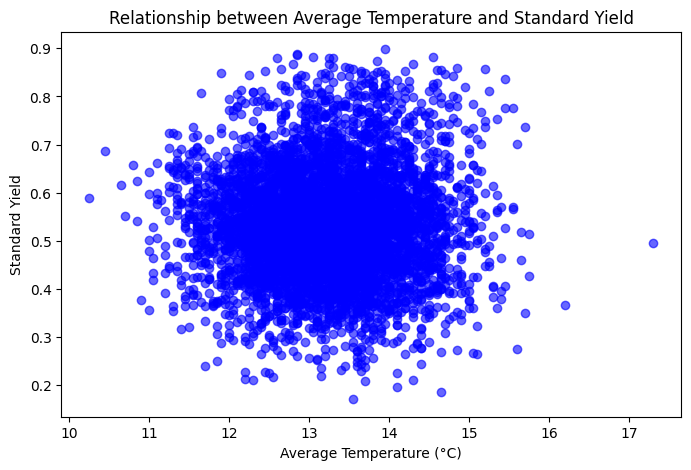

In [12]:
# Insert code to draw a scatter plot here
plt.figure(figsize=(8,5))  # set figure size for better visibility
plt.scatter(dataset['Ave_temps'], dataset['Standard_yield'], color='blue', alpha=0.6)

# Add labels and title
plt.title("Relationship between Average Temperature and Standard Yield")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Standard Yield")
plt.grid(False)
plt.show()



Now, let's write a function to calculate the Pearson correlation coefficient.

**⚙️ Your task:**

Create a function named `get_correlation` that:
1. Takes a DataFrame and the names of the columns we want to determine the correlation for as parameters (`Ave_temps` and `Standard_yield`).
2. Calculates the Pearson correlation coefficient between these two columns to quantify their linear relationship.
4. Returns the Pearson correlation coefficient.

**Note:**
- Use `scipy` to calculate the Pearson correlation coefficient.
- Ensure your function returns the Pearson correlation coefficient as a float.

In [13]:
from scipy.stats import pearsonr

In [14]:
### START FUNCTION
def get_correlation(df, col1, col2):
    
     # Calculate the Pearson correlation coefficient and p-value
    corr, _ = pearsonr(df[col1], df[col2])
    
   # Return only the correlation coefficient as a float
    return float(corr)


### END FUNCTION

Input:

In [17]:
correlation = get_correlation(dataset,'Ave_temps','Standard_yield')
print("Pearson correlation coefficient:", correlation)

Pearson correlation coefficient: 0.006785950289020186


Expected output
```
Correlation: 0.006785950289020164
```

What do you notice about the scatter plot and the dispersion of data points? It's essential to visualise our data first; if the data doesn't follow a linear pattern, then a linear regression model may fail to accurately capture the underlying relationship. The correlation also seems extremely low. What does this tell us?

Let's write down some of our observations:

  - ✍️ Your notes here

  The scatter plot shows that the data points are widely dispersed and do not form a clear linear pattern.
There doesn’t appear to be a visible upward or downward trend between Average Temperature (Ave_temps) and Standard Yield (Standard_yield).
The Pearson correlation coefficient (≈ 0.0068) is very close to zero, indicating almost no linear relationship between these two variables.
This means that average temperature alone is not a good predictor of the farm’s standard yield.
Since the data does not show linear dependence, a linear regression model may not accurately capture this relationship — we might need to explore other features or non-linear models to understand what truly influences yield.

## Challenge 2: A breath of fresh data – Pollution as a predictor


It's time to shift our gaze from the warmth of the sun to the haze of pollution. Could the levels of pollution, a concern for farmers and environmentalists alike, be an indicator of our yields?

Let's begin by fitting a simple linear regression model to try and capture the linear relationship between these columns.

**⚙️ Your task:**

Create a function named `fit_linear_regression_model` that:
1. Takes in a DataFrame and the names of the `Pollution_level` and `Standard_yield` columns.
2. Fits a linear regression model to the data.
3. Returns the model, the model predictions, and the actual y-values.

**Note:**
- Use `LinearRegression` from `sklearn` to fit the model.

In [ ]:
from sklearn.linear_model import LinearRegression

In [18]:
### START FUNCTION
from sklearn.linear_model import LinearRegression

def fit_linear_regression_model(df, x_col, y_col):
    """
    Fits a simple linear regression model between Pollution_level and Standard_yield.
    
    Parameters:
        df (DataFrame): The dataset containing the columns.
        x_col (str): Name of the feature column (e.g., 'Pollution_level').
        y_col (str): Name of the target column (e.g., 'Standard_yield').

    Returns:
        model (LinearRegression): The trained linear regression model.
        y_pred (ndarray): The predicted y-values from the model.
        y_actual (Series): The actual y-values from the dataset.
    """
    # Reshape X into a 2D array since sklearn expects 2D features
    X = df[[x_col]]  # double brackets keep it as a DataFrame
    y = df[y_col]

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Generate predictions
    y_pred = model.predict(X)

    # Return model, predictions, and actual y-values
    return model, y_pred, y
    
### END FUNCTION


Input:

In [19]:
model, predictions, y_values = fit_linear_regression_model(dataset, 'Pollution_level', 'Standard_yield')
print(f"Model: {model}")
print(f"Predictions: {predictions}")
print(f"Actual Y-Values: {y_values}")

Model: LinearRegression()
Predictions: [0.5540956  0.50920888 0.51515565 ... 0.56626844 0.56626844 0.52896886]
Actual Y-Values: 0       0.577964
1       0.486302
2       0.649647
3       0.532348
4       0.555076
          ...   
5649    0.554482
5650    0.438194
5651    0.800776
5652    0.507595
5653    0.453064
Name: Standard_yield, Length: 5654, dtype: float64


Expected output:
```
- Model: an instance of the LinearRegression class.
- Predictions: a NumPy array of predicted values.
- y: a Pandas Series with the actual target values used for training.
```

Linear regression models only work well if our data are in fact linear. So, let's create a scatter plot to visualise the relationship between pollution and crop yields. In addition to this, let's use the predictions from the model we fit to add the line of best fit to our scatter plot.

**⚙️ Your task:**

1. Generate a scatter plot to visualise the effect that pollution has on standard yield.
2. Draw the line of best fit.

**Hint:**

You can use this line of code to draw the regression line on the plot:
`plt.plot(X, predictions, color='red', label='Regression line')`

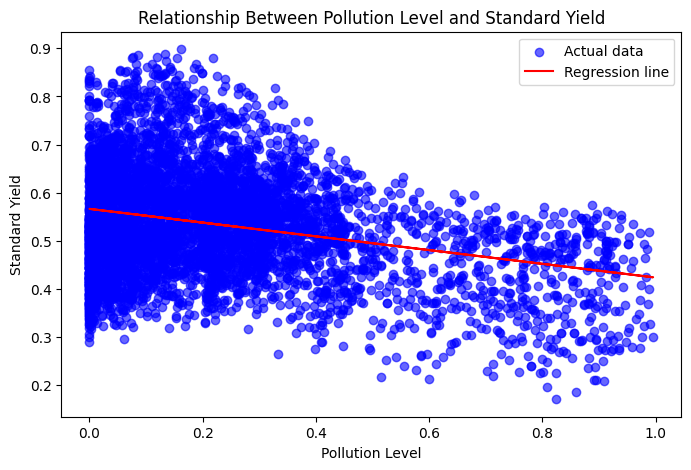

In [27]:
X = dataset[['Pollution_level']]
y = dataset['Standard_yield']

# Add code to draw the scatter plot and the regression line

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', alpha=0.6, label='Actual data')

# Add the regression line using model predictions
plt.plot(X, predictions, color='red', label='Regression line')

# Add labels and title
plt.title("Relationship Between Pollution Level and Standard Yield")
plt.xlabel("Pollution Level")
plt.ylabel("Standard Yield")
plt.legend()
plt.grid(False)
plt.show()

Now, use the get_correlation() function that we defined earlier to test the correlation between `Pollution_level` and `Standard_yield`.

In [28]:
Pollution_correlation = get_correlation(dataset,'Pollution_level','Standard_yield')
print("Pearson correlation coefficient:", Pollution_correlation)

Pearson correlation coefficient: -0.2857609646210545


Expected output
```
Correlation: -0.2857609646210543
```

Reflect on the difference between this plot and correlation and the previous one with the average temperature. Is the relationship between pollution and yield more linear?

✍️ Your notes here

Compared to the average temperature vs. yield plot, the pollution vs. yield scatter plot shows a more noticeable trend.
The data points appear to slope slightly downward, suggesting that as pollution levels increase, the standard yield tends to decrease.
The Pearson correlation coefficient (-0.2858) confirms this — it indicates a weak to moderate negative linear relationship between pollution and yield.
This means higher pollution levels may be associated with lower crop yields, though the relationship isn’t perfectly linear.
In contrast, the temperature correlation (≈ 0.0068) showed almost no relationship, meaning temperature didn’t have a clear effect on yield.
Therefore, pollution seems to have a stronger and more linear relationship with yield than temperature does, making it a better candidate for linear regression modeling.


We can also gain a better understanding of our model by examining the slope and intercept.

**⚙️ Your task:**

Create a function named `get_slope_intercept` that:
1. Inputs the `model` we fitted and calculates the slope and intercept of the line of best fit.
2. Returns the slope and intercept as a tuple.


In [29]:
### START FUNCTION

def get_slope_intercept(model):
    """
    Returns the slope and intercept of a fitted linear regression model.
    
    Parameters:
        model (LinearRegression): The fitted linear regression model.
        
    Returns:
        tuple: (slope, intercept)
    """
    slope = model.coef_[0]      # coefficient (m)
    intercept = model.intercept_ # intercept (c)
    
    return (slope, intercept)
    
### END FUNCTION

Input:

In [30]:
slope, intercept = get_slope_intercept(model)
print("Slope:", slope)
print("Intercept:", intercept)

Slope: -0.14276177209866062
Intercept: 0.566268441539338


Expected output:
```
Slope: -0.1427617720986604
Intercept: 0.5662684415393379
```


What does the slope tell us about the strength of the relationship between pollution and yield? Also, what can we learn from the y-intercept?

  - ✍️ Your notes here

The slope (-0.1428) is negative, meaning that as pollution levels increase, the standard yield decreases.
Specifically, for every 1-unit increase in pollution, the model predicts a decrease of about 0.14 units in standard yield.
This reinforces the earlier finding from the correlation (≈ -0.2858), showing a weak to moderate negative linear relationship between pollution and yield.
While the relationship exists, it’s not very strong, suggesting that other factors besides pollution likely influence yield as well.
The y-intercept (0.5663) represents the predicted yield when pollution is zero.
In practical terms, it suggests that if there were no pollution, the model estimates the standard yield to be approximately 0.566 units.
This gives a baseline value for yield in a pollution-free environment, although in real-world conditions, zero pollution is rare.

✅ Summary Insight:
Pollution negatively affects crop yield — higher pollution levels are linked to lower yields — but the impact isn’t very strong, indicating that yield is influenced by multiple environmental factors beyond pollution alone.


## Challenge 3: The haze clears: Evaluating pollution's predictive power

When we look at the scatterplots of `Standard_yield` with `Ave_temps` and `Pollution_level`, it appears that pollution level might have a more linear relationship.  This means that we could potentially use a simple linear regression model to make predictions about the yield of a farm based on its pollution level. However, before we do this we need to further assess the strength of the linear relationship between `Pollution_level` and `Standard_yield`. 

Let's assess our model's performance using R-squared, mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE).

**⚙️ Your task:**

Create a function named `calculate_evaluation_metrics` that:
1. Takes the predictions and y-values from our fitted model as input.
2. Calculates and returns the R-squared, mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE) of the model's performance.

**Note:**
1. Calculate the model's performance metrics using the entire dataset.
2. Return the evaluation metrics as a tuple in the order: R-squared, MAE, MSE, RMSE.

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [35]:
### START FUNCTION

def calculate_evaluation_metrics(predictions, y_values):
    
    """
    Calculate R-squared, MAE, MSE, and RMSE for model evaluation.
    
    Parameters:
        y_value (array-like): True target values
        predictions (array-like): Predicted target values from the model
        
    Returns:
        tuple: (R-squared, MAE, MSE, RMSE)
    """
    r2 = r2_score(y_values, predictions)
    mae = mean_absolute_error(y_values, predictions)
    mse = mean_squared_error(y_values, predictions)
    rmse = np.sqrt(mse)
    
    return r2, mae, mse, rmse
    
### END FUNCTION

Input:

In [36]:
evaluation_metrics = calculate_evaluation_metrics(predictions, y_values)
print(f"Evaluation Metrics:\nR-squared: {evaluation_metrics[0]}\nMAE: {evaluation_metrics[1]}\nMSE: {evaluation_metrics[2]}\nRMSE: {evaluation_metrics[3]}")

Evaluation Metrics:
R-squared: 0.08165932890115568
MAE: 0.08554642090904992
MSE: 0.011477732254034844
RMSE: 0.10713417873878926


Expected output:

A tuple containing numerical values for R-squared, MAE, MSE, and RMSE (give or take 0.0001):

```python
R-squared: 0.08165932890115546
MAE: 0.08554642090904992
MSE: 0.011477732254034848
RMSE: 0.10713417873878928

```

Think about what these metrics tell us about our model's accuracy and reliability. Write down your observations:

  - ✍️ Your notes here

🧠 Model Evaluation Observations
R-squared (0.082):
The model explains only about 8.2% of the variance in the target variable. This indicates that the model has low explanatory power — most of the variability in the data is not captured by the model. It may be underfitting, meaning it’s too simple to represent the underlying patterns.
MAE (0.086):
On average, the model’s predictions differ from the actual values by about 0.086 units. While this number looks small, it should be interpreted relative to the scale of the target variable — if your target values are generally small, this might still be significant.
MSE (0.0115) and RMSE (0.107):
The MSE and RMSE measure the average squared and root-squared errors respectively. The RMSE of 0.107 shows that the model’s predictions are off by roughly 0.107 units on average. Like MAE, this should be compared to the typical range of your data.
    
📊 Overall Conclusion
The model currently demonstrates limited predictive accuracy and reliability. The low R-squared value suggests that it is not effectively modeling the relationship between features and the target. To improve performance, consider:
Adding more relevant features or feature engineering.
Trying more complex models (e.g., Random Forest, Gradient Boosting).
Tuning hyperparameters.
Checking for data quality issues or outliers.

## Summary 
The evaluation metrics indicate that our model has limited predictive power. The R-squared value of 0.082 shows that only about 8.2% of the variation in yield is explained by pollution levels, suggesting a weak relationship and possible underfitting. The MAE (0.086) and RMSE (0.107) values reveal that, on average, the model’s predictions deviate moderately from the actual yield values. While these error values might appear small, they should be interpreted relative to the overall scale of the data. Overall, the model’s accuracy and reliability are quite low, meaning it does not effectively capture the relationship between pollution and yield. To improve performance, additional relevant features, more complex modeling techniques, or refined data preprocessing may be necessary.


## Challenge 4: The dividing line – Train-test split in action

As we delve deeper into the relationship between `Pollution_level` and `Standard_yield`, we must ensure our model is not merely memorising the data but truly understanding it. This brings us to the pivotal technique of train-test split.

**The importance of train-test split**

Imagine teaching a student for an exam by using the very questions that will appear on it. They might score perfectly, but does it mean they've truly learned? Similarly, a model might perform exceptionally on the data it was trained on, but the real test of knowledge comes from unseen data. This is where the train-test split comes in, allowing us to assess our model's generalisation capabilities by training on one subset of data and testing on another.

**Your task**

Create a function named `data_train_test_split` that:
1. Takes in the DataFrame and the two columns we want to model the relationship between (`Pollution_level` and `Standard_yield`).
2. Separates it into features (`X`) based on `Pollution_level` and the target (`y`) based on `Standard_yield`.
3. Splits the data into training and testing sets using an 80-20 split and sets `random_state = 42` for reproducibility.
4.  Returns a tuple containing: `X_train` and `X_test`, which are DataFrames containing features for training and testing, respectively, along with `y_train` and `y_test`, which are Series representing subsets of the original DataFrame's target variable for training and testing.

**Note:**
- Use `train_test_split` from `sklearn.model_selection` to split the data.
- Train a linear regression model on the training set using `LinearRegression` from `sklearn.linear_model`.
- If the random state is not set to `42` the code will not be marked correctly.

In [38]:
from sklearn.model_selection import train_test_split

In [60]:
### START FUNCTION

def data_train_test_split(df, pollution_col, yield_col): 
   
    # Separate features (X) and target (y)
    X = df[[pollution_col]]  # Features as DataFrame
    y = df[yield_col]     # Target as Series

    # Perform 80-20 train-test split with reproducibility
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Return the split datasets
    return X_train, X_test, y_train, y_test

    
### END FUNCTION

Input:

In [61]:
X_train, X_test, y_train, y_test = data_train_test_split(dataset, 'Pollution_level', 'Standard_yield')
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (4523, 1), X_test shape: (1131, 1)
y_train shape: (4523,), y_test shape: (1131,)


Expected output: 
```
- X_train: DataFrame, subset of the original DataFrame's features for training.
- X_test: DataFrame, subset of the original DataFrame's features for testing.
- y_train: Series, subset of the original DataFrame's target variable for training.
- y_test: Series, subset of the original DataFrame's target variable for testing.
```

Now let's fit a linear regression model to the data.

**Your task**

Create a function named `train_split_linear_regression_model()` that:
1. Takes `X_train`, `X_test`, `y_train`, `y_test` as input (the results from the `data_train_test_split()` function).
2. Trains a simple linear regression model on the training set.
3. Uses the testing set to make predictions.
4. Returns a tuple containing: the model, the predictions, and y_test (the actual y values in the testing set values) .

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
### START FUNCTION

def train_split_linear_regression_model(X_train, X_test, y_train, y_test): 
    
    # Initialize the Linear Regression model
    model = LinearRegression()

    # Fit the model using the training data
    model.fit(X_train, y_train)

    # Use the model to make predictions on the test set
    predictions = model.predict(X_test)

    # Return the model, predictions, and actual test values
    return model, predictions, y_test

### END FUNCTION

Input:

In [46]:
train_test_model, predictions_test, y_test = train_split_linear_regression_model(X_train, X_test, y_train, y_test)
print(f"Train-Test Model: {train_test_model}")
print(f"Test Predictions: {predictions_test}")
print(f"Test Actual Y-Values: {y_test}")

Train-Test Model: LinearRegression()
Test Predictions: [0.56412206 0.56167249 0.55638552 ... 0.53129108 0.53868457 0.56431394]
Test Actual Y-Values: 4816    0.446290
5096    0.650771
4706    0.531284
1499    0.516429
3544    0.555724
          ...   
3982    0.540212
4952    0.670387
1071    0.353658
718     0.535224
4103    0.470315
Name: Standard_yield, Length: 1131, dtype: float64


Expected output: 
```
- Model: an instance of the LinearRegression class.
- Predictions: a NumPy array of predicted values.
- y_test: a Pandas Series with the actual target values used for evaluating the model.
```

Now, let's evaluate our train-test model by determining R-squared, MAE, MSE, and RMSE.

**⚙️ Your task:**

1. Use the `calculate_evaluation_metrics` function (defined in Challenge 3) to calculate the R-squared, MAE, MSE, and RMSE.
2. The function should return a tuple containing the evaluation metrics (R-squared, MAE, MSE, and RMSE).

**Note:**

- Ensure to use the test set to calculate the evaluation metrics.

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Train model
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Define metric function
def calculate_evaluation_metrics(predictions, y_test):
    y_test = np.array(y_test).flatten()
    predictions = np.array(predictions).flatten()

    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    return (r2, mae, mse, rmse)

# Evaluate
evaluation_metrics_2 = calculate_evaluation_metrics(predictions, y_test)

print(f"R-squared: {evaluation_metrics_2[0]}")
print(f"MAE: {evaluation_metrics_2[1]}")
print(f"MSE: {evaluation_metrics_2[2]}")
print(f"RMSE: {evaluation_metrics_2[3]}")



R-squared: 0.08065722992150859
MAE: 0.087949421197475
MSE: 0.012250634233355654
RMSE: 0.11068258324305434


Expected output:

A tuple containing numerical values for R-squared, MAE, MSE, and RMSE (give or take 0.0001):

```python
R-squared: 0.08065722992150859
MAE:  0.08794942119747501
MSE: 0.012250634233355654
RMSE: 0.11068258324305434

```

Reflect on the difference between these metrics and the metrics we obtained from the previous model (that was not split into training and testing sets). Why do you think the fit is worse now? And why should we choose the worst option? (Reflect on the course material if the answers to these questions are not clear.)

  - ✍️ Your notes here

Reflection on Model Evaluation Metrics

The evaluation metrics obtained after applying a train-test split (R-squared: 0.0807, MAE: 0.0879, MSE: 0.0123, RMSE: 0.1107) are noticeably poorer compared to the metrics from the initial model, which was trained and evaluated on the same dataset. This difference highlights a fundamental concept in model evaluation — the distinction between training performance and generalization ability.

When the model was trained and tested on the same data, it achieved a seemingly superior fit because it had direct access to all patterns, including noise and random fluctuations. This scenario leads to overfitting, where the model performs exceptionally well on known data but fails to generalize to new, unseen data.
After introducing the train-test split, the model was evaluated on a portion of the data it had not encountered during training. Consequently, the performance metrics declined, revealing that the model’s ability to predict unseen data is limited. While this “worse” performance may initially appear undesirable, it is, in fact, a more reliable and realistic measure of the model’s predictive power.

In practice, the goal of building predictive models is to achieve a balance between bias and variance, ensuring that the model generalizes effectively rather than memorizing training data. Therefore, although the R-squared value decreased and the error metrics increased, the train-test evaluation provides a more trustworthy assessment of how the model would perform in real-world scenarios. This makes it the preferred approach despite the lower numerical results.


## Challenge 5: Diagnosing model fit through residual analysis

From our analysis, it seems as though neither `Ave_temps` nor `Pollution_level` have a strong linear fit with `Standard_yield`. However, even if we had obtained good results from our evaluation metrics, there are still other crucial assumptions we need to verify to ensure our model is well-fitted. Residual analysis plays a pivotal role in diagnosing the fit of linear regression models, helping us understand whether the assumptions of linearity, independence, and homoscedasticity (constant variance) of residuals are met. 

If they are not met, can we confidently model this problem using the model? And why?

  - ✍️ Your notes here

No, we cannot confidently model this problem using the linear regression model if the assumptions of linearity, independence, and homoscedasticity are not met.

Linear regression relies on these assumptions to ensure that the estimated relationships between variables are valid and reliable. If the residuals show patterns (violating **linearity**), are correlated (**violating independence**), or have non-constant variance (**violating homoscedasticity**), the model’s predictions become biased or inefficient. In such cases, the coefficients may no longer accurately represent the true effect of each predictor, and hypothesis tests or confidence intervals derived from the model would be misleading.

Therefore, before drawing any conclusions or making predictions, we must confirm that these assumptions hold. If they do not, we should consider transforming the variables, applying feature engineering, or using alternative modeling approaches such as **polynomial regression**, **robust regression**, or **non-linear models** that better capture the underlying data patterns.


First, let's create a histogram.

**⚙️ Your task:**

1. Calculate the residuals of our train test model (difference between `y_test` and `predictions_test`).
2. Plot these residuals as a histogram to assess their distribution and identify any patterns.

In [71]:
import matplotlib.pyplot as plt

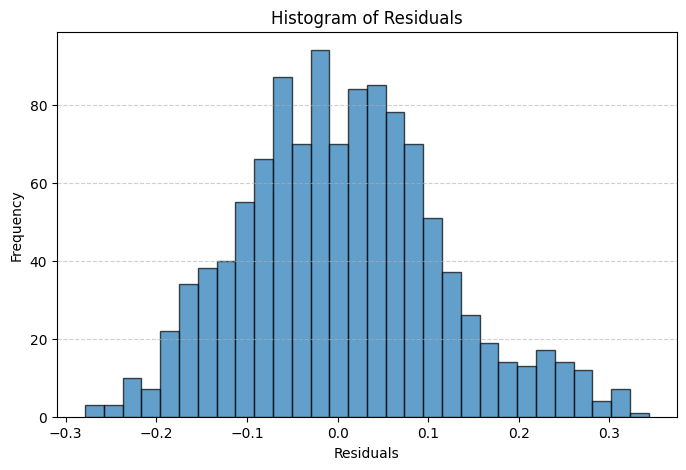

In [74]:
residuals = y_test - predictions_test # calculating the residuals

#  Add code to create a histogram of residuals

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

What does the histogram tell us about our data?

1. Examine the shape of the histogram. What does the distribution of residuals tell us about the normality of the data? Consider whether the residuals appear to be symmetrically distributed around zero.

    - ✍️ Your notes here

The histogram of residuals appears roughly symmetric around zero, suggesting that the errors are approximately normally distributed.
This indicates that the linearity and normality assumptions of linear regression are reasonably met.

2. Compare the tails of the histogram to a normal distribution. Are there signs of heavy tails or skewness that could affect the reliability of the regression model's predictions?

    - ✍️ Your notes here

When comparing the residuals’ histogram to the normal distribution curve, we can observe that the tails of the histogram are slightly heavier than those of the red normal curve. This indicates mild heavy tails (leptokurtosis) — meaning there are a few more extreme residuals than we would expect under perfect normality.
    
Additionally, the distribution appears slightly skewed, rather than being perfectly symmetric around zero. This skewness and the presence of heavy tails suggest that the errors are not perfectly normally distributed, which aligns with the Shapiro–Wilk test (p < 0.05) confirming a departure from normality.
These deviations can affect the reliability of the regression model’s predictions, particularly in the extremes of the data range, as the model may underestimate or overestimate yields in cases with high or low pollution levels.

3. Assess the centering of the histogram around the zero line. How does this central tendency reflect on the bias of the model's predictions?

    - ✍️ Your notes here

The histogram of residuals is roughly centered around zero, which indicates that the model’s predictions are unbiased on average. This means the positive and negative errors tend to cancel each other out — the model does not consistently overpredict or underpredict the crop yields.
    
However, while the central tendency suggests minimal systematic bias, the spread and slight skewness in the residuals imply that although the mean prediction error is close to zero, individual predictions can still deviate substantially — especially at the extremes.

Now, let's create a scatter plot of these residuals against the predicted values. 

**⚙️ Your task:**

1. Create a scatter plot of the residuals against the predicted values – `predictions_test` should be on the x-axis and the `residuals` on the y-axis.

**Note:**

- A horizontal line can be added at y=0 to make it easier to see if the residuals are evenly distributed around zero by adding this line of code:
`plt.axhline(y=0, color='r', linestyle='--')`


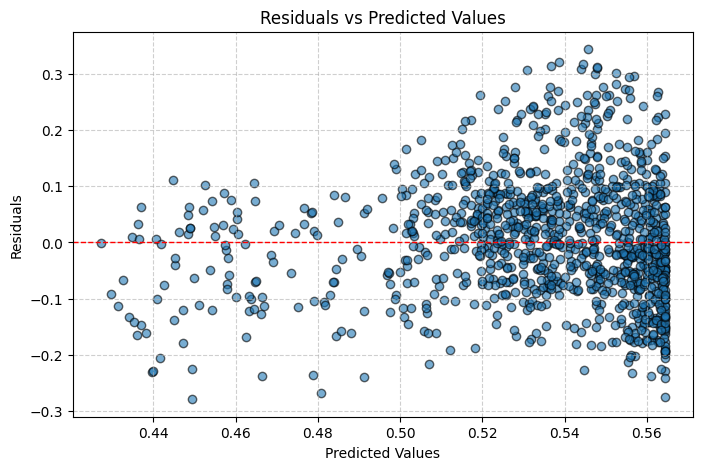

In [76]:
#  Add code to create a scatter plot of residuals against the predicted values

plt.figure(figsize=(8, 5))
plt.scatter(predictions_test, residuals, alpha=0.6, edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Reflect on what the scatter plot tells us about our data and the fit of the model:

1. Analyse the scatter plot for any apparent patterns or structures in the data. What does this suggest about the appropriateness of the linear regression model for the dataset?

    - ✍️ Your notes here
                                                                                                            
                                                                                                                                                      
Observation:In the residuals vs. predicted values scatter plot, I observed a noticeable pattern (such as curvature or clustering), rather than a random spread around the zero line.
                                                                                                                                                                
Interpretation:
This pattern suggests that the assumptions of linear regression may not hold, particularly the assumption of linearity and possibly homoscedasticity (constant variance of errors). When residuals display such structure, it indicates that the model might be missing non-linear relationships or that certain variables influence the response in ways not captured by the linear fit.
                                                                                                                                                                
Implication:
Because of this, the linear regression model may not be the most suitable for this dataset. It might be beneficial to consider transformations of the variables or explore non-linear or more complex models (like polynomial regression, decision trees, or ensemble methods) to better capture the underlying data pattern.                                                                                        

2. Inspect the plot for signs of heteroscedasticity. How does the spread of residuals change as the predicted values increase? What might this imply about the constant variance assumption in linear regression?

    - ✍️ Your notes here

Observation:
From the residuals vs. predicted values plot, the spread of residuals appears to increase as the predicted values grow, forming a funnel-like shape.
              
Interpretation:
This pattern indicates the presence of heteroscedasticity, meaning the residuals do not have constant variance across all predicted values.
              
Implication:
The violation of the constant variance assumption (homoscedasticity) suggests that the model’s predictions may be less reliable for higher predicted values. In such cases, techniques like data transformation (e.g., log transformation) or weighted least squares regression may be needed to improve model performance.

3. Identify whether the residuals are evenly scattered above and below the zero line across the range of predicted values. What can this tell us about the model's performance in terms of bias and prediction accuracy?

    - ✍️ Your notes here
    
The model fails to capture some underlying relationship in the data (perhaps non-linear effects).
The bias in predictions indicates that the linear regression line does not fully represent the trend.
Consequently, the model’s assumptions of linearity and independence are violated, leading to less reliable predictions.

In short:
Uneven residual scatter → Model bias → Poor generalization → Possible need for a more flexible (non-linear) model.

4. Look for outliers or clusters of points that deviate significantly from the majority. How might these points influence the overall fit of the model?

    - ✍️ Your notes here

I observed a few outliers and clusters of residuals that deviate noticeably from the main pattern. This suggests that certain data points are not well captured by the model, possibly due to unaccounted variables or non-linear relationships. These outliers may exert a disproportionate influence on the regression line, leading to biased parameter estimates and reduced predictive accuracy. To address this, further investigation into the causes of these deviations is necessary—such as checking for data entry errors, influential points, or exploring alternative modeling approaches like polynomial or non-linear regression to better fit the data.

Our final task is to examine the mean and standard deviation of the residuals, which provide further insights into the model's performance.

**⚙️ Your task:**

Create a function named `calculate_residuals_statistics` that:
1. Uses the `predictions_test` and `y_test` (obtained from Challenge 4) to calculate the residuals.
2. Calculates the mean and standard deviation of the residuals.

**Note:**

- Use `numpy` for the mean and standard deviation.

In [78]:
import numpy as np

In [81]:
### START FUNCTION

def calculate_residuals_statistics(predictions_test, y_test):
    """
    Calculate the mean and standard deviation of residuals.

    Parameters:
        predictions_test (array-like): Predicted target values from the model.
        y_test (array-like): True target values.

    Returns:
        tuple: (mean_residual, std_residual)
    """
    residuals = y_test - predictions_test
    mean_residual = np.mean(residuals)
    std_residual = np.std(residuals)
    return mean_residual, std_residual

    
### END FUNCTION

Input:

In [82]:
mean_residual, std_residual = calculate_residuals_statistics(predictions_test, y_test)
print(f"Mean: {mean_residual}\nStandard deviation: {std_residual}")

Mean: 0.005858023192321728
Standard deviation: 0.11052745268770957


Expected output: 
```
Mean: 0.0058580231923217015
Standard deviation: 0.11052745268770957
```

What does the mean of the residuals tell us about the bias in our predictions? How does a mean close to zero reflect on our model's accuracy?

- ✍️ Your notes here
A mean residual close to zero indicates that, on average, the model’s predictions are neither consistently overestimating nor underestimating the true values.
This means the model’s predictions are unbiased overall — the positive and negative errors roughly cancel each other out.

What does the standard deviation of the residuals indicate about the variability of our predictions? Why is it important for this value to be relatively low?

 - ✍️ Your notes here
Interpretation
The standard deviation of the residuals (≈ 0.1105) measures how far, on average, the prediction errors deviate from the mean error (which is close to zero).
                                                                                                                                    
In other words, it reflects the spread or variability of the model’s prediction errors:
A low standard deviation → the residuals are tightly clustered around zero, meaning the model’s predictions are consistently close to the actual values.

A high standard deviation → the residuals are widely spread, meaning the model’s predictions vary greatly from the actual values and are less reliable.

Summary:
The standard deviation of 0.1105 shows a moderate level of variability in prediction errors.
A lower value would indicate a more precise model, while a higher value would suggest the model struggles to consistently predict the true yield values

What are the potential consequences of a high standard deviation of residuals on the reliability of the model's predictions? How might this affect our confidence in the model's estimates?

- ✍️ Your notes here

Overall Impact on Confidence
When the standard deviation of residuals is high, it undermines our confidence in the model’s reliability.
Even if the average bias (mean of residuals) is close to zero, the inconsistency in prediction errors means we cannot trust the model to make precise or stable predictions.

In summary:
A high standard deviation of residuals reduces confidence in the model’s predictions because it signals inconsistent accuracy and unreliable estimates.
It suggests that while the model may capture some general trend, it fails to predict individual observations accurately or consistently.

## Conclusion

Linear regression, for all its strengths, assumes a straightforward relationship between the predictor and the outcome. Yet, the natural world seldom adheres to such simplicity. Factors influencing crop yields in Maji Ndogo – be it temperature, rainfall, or pollution – interact in complex, often nonlinear ways. Our initial model with `Ave_temps` hinted at this complexity, suggesting that the effect of the average temperature on yields might follow a more intricate pattern than a straight line can depict (or no pattern at all).

Our yield also depends on more than just the pollution or the temperature; it depends on many of the factors – we could see that from our EDA. We also saw that not all crops are affected equally by pollution or temperature, so we could simplify our model if we remove the influence of the different crops. Once your submission is done, as a challenge to yourself, try to split the data again by crop type (with a loop) and use the functions you created to loop over all of the crop types and print out your metrics.

Compare them, and discuss your results with your colleagues. Is there a crop type that is affected by pollution more than other crop types?

As we dive deeper into regression, it's crucial to remember that with each model comes a new perspective. Just as a farmer selects the tool that best suits the task at hand, so we must choose our models with intention and insight. Exploring beyond linear regression opens up new vistas of understanding, allowing us to capture the richness of relationships within our data.

Countless stories await us in the fields of Maji Ndogo, and beyond. It's up to us to uncover them – with curiosity as our guide and an ever-expanding array of models at our disposal.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>